# Matrix Factorization

## MF의 특징

* **데이터의 패턴 =유저/아이템의 잠재적 특성**
    * 이웃 기반 CF은 유저/아이템 벡터를 데이터를 통해 계산된 형태로 저장하고 있지만,
    * Model-basedCF의 경우 유저,아이템 벡터는 모두 학습을 통해 변하는 파라미터임
* **Realworld에서 MatrixFactorization기법이 가장 많이 사용됨**
    * 최근에 MF원리를 DeepLearning에 응용한 모델이 더 높은 성능을 냄

## MF의 장점

* **모델의 학습/서빙**
    * 유저-아이템 데이터는 학습에만 사용되고 학습된 모델은 압축된 형태로 저장됨
    * 이미 학습된 모델을 통해 추천 결과를 서빙하기 때문에 속도가 빠름
* **Sparsity/Scalability극복**
    * 이웃 기반 CF에 비해 sparse한 데이터에서도 좋은 성능을 보임
    * 사용자,아이템 개수가 늘어나도 좋은 추천 성능을 보임
* **Overfitting 방지**
    * 이웃 기반 CF와 비교했을 때 전체 데이터의 패턴을 학습하도록 모델이 작동함
* **LimitedCoverage**
    * 이웃 기반 CF의 경우 공통의 유저 /아이템을 많이 공유해야만 유사도 값이 정확해짐
    * 유사도 값이 정확하지 않은 경우 이웃의 효과를 보기 어려움

## SVD(Singular Value Decomposition)

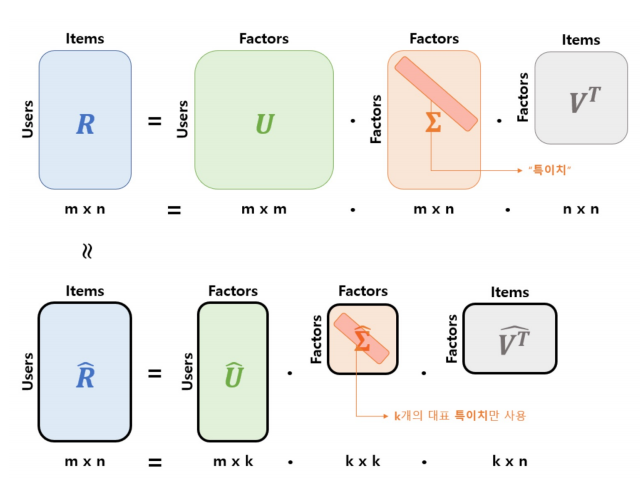

* **Full SVD : $R=U\Sigma V^T$**
    * $U$ : 유저의 Latent Factor
    * $V$ : 아이템의 Latent Factor
    * $\Sigma$ : Latent Factor의 중요도

* **Truncated SVD : $R = U\Sigma V^T \approx \hat{U}\Sigma_k\hat{V^T} = \hat{R}$**
    * 대표값으로 사용될 k개의 특이값만 사용함
    * k는 모델의 하이퍼 파라미터
    
    * 평점 예측 $\hat{R}$ 은 축소된 $\hat{U}\Sigma_k\hat{V^T}$에 의해 계산됨
    * k개의 LatentFactor의 의미를 유추할 수 있지만 정확히 어떤 특성을 갖는 지 알 수 없음

## SVD의 단점

* **분해(Decomposition)하려는 행렬의 Knowledge가 불완전할 때 정의되지 않음**
    * Sparsity가 높은 데이터의 경우 결측치가 매우 많고,실제 데이터는 대부분 SparseMatrix임
* **따라서 결측된 entry를 모두 채우는 Imputation을 통해 DenseMatrix를 만들어 SVD를 수행함**
    * Imputation은 데이터의 양을 상당히 증가시키므로,Computation비용이 높아짐
    * ex)결측된 entry를 0or유저/아이템의 평균 평점으로 채움
* **정확하지 않은 Imputation은 데이터를 왜곡시키고 예측 성능을 떨어뜨림**
    * 행렬의 entry가 매우 적을 때 SVD를 적용하면 과적합 되기 쉬움

*  **SVD의 원리를 차용하되, MF를 학습하기 위한 근사적인 방법이 필요함**

## SVD Tutorial

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '/Users/yeomyungro/Documents/github/recommendation/'

In [4]:
rating = pd.read_csv(path+'data/ml-latest-small/ratings.csv', encoding='utf-8')

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
train_df, test_df = train_test_split(rating, test_size=0.2, random_state=1990)
print(train_df.shape)
print(test_df.shape)

(80668, 4)
(20168, 4)


sparse matrix 생성

In [7]:
u_i_mt = train_df.pivot_table('rating', 'userId', 'movieId')
u_i_mt

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


유저 평균으로 빈 값 채우기

In [8]:
u_i_mt = u_i_mt.apply(lambda x: x.fillna(x.mean()), axis=1)
u_i_mt

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,4.345946,4.000000,4.345946,4.345946,4.000000,4.345946,4.345946,4.345946,4.345946,...,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946
2,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,...,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636
3,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,...,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059
4,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,...,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913
5,4.000000,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,...,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.500000,3.655793,3.655793,3.655793,3.655793,3.655793,2.500000,3.655793,3.655793,3.655793,...,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793
607,4.000000,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,...,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833
608,3.181682,3.181682,2.000000,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,...,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682


svd

In [10]:
def calculate_SVD(matrix, k=20):
    
    # svd
    u, sig, i = np.linalg.svd(matrix)
    
    # user matrix 중 k개 latent factor만 사용
    u_hat = u[:, :k]
    
    # item matrix 중 k개 latent factor만 사용
    i_hat = i[:k, :]
    
    # matrix의 singular value 값으로 가장 큰 값부터 내림차순으로 정렬되어 있음
    sig_hat = sig[:k] * np.identity(k, np.float)
    
    user_factors = u_hat
    item_factors = np.matmul(sig_hat, i_hat)
    
    return user_factors, item_factors

In [24]:
k = 50
u_f, i_f = calculate_SVD(u_i_mt, k)

In [25]:
print(u_f.shape)
print(i_f.shape)

(610, 50)
(50, 8889)


In [26]:
predicted_result = pd.DataFrame(np.matmul(u_f, i_f),
                                columns=u_i_mt.columns.values, index=u_i_mt.index.values)

In [27]:
predicted_result

,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
1,4.370431,4.262348,4.217864,4.339291,4.339997,4.111414,4.257744,4.332072,4.336647,4.252254,...,4.350739,4.350739,4.345887,4.345725,4.346050,4.345887,4.345887,4.345887,4.345887,4.345031
2,3.883732,3.850093,3.818132,3.858774,3.877029,3.840278,3.816102,3.856676,3.856487,3.873237,...,3.863654,3.863654,3.863159,3.861826,3.864492,3.863159,3.863159,3.863159,3.863159,3.863475
3,2.453323,2.421168,2.382111,2.406857,2.432541,2.356768,2.402420,2.402994,2.385062,2.425061,...,2.401475,2.401475,2.396621,2.395356,2.397886,2.396621,2.396621,2.396621,2.396621,2.396626
4,3.645982,3.507161,3.454385,3.523871,3.608412,3.163045,3.780318,3.529281,3.591193,3.871830,...,3.577985,3.577985,3.549718,3.551948,3.547488,3.549718,3.549718,3.549718,3.549718,3.545241
5,3.742979,3.613913,3.615609,3.628130,3.607402,3.713397,3.592645,3.636220,3.639177,3.674248,...,3.640050,3.640050,3.648422,3.647782,3.649061,3.648422,3.648422,3.648422,3.648422,3.649722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.105236,3.761777,3.637386,3.660818,3.567800,3.511978,2.397297,3.680628,3.688601,3.725348,...,3.651766,3.651766,3.655711,3.655482,3.655941,3.655711,3.655711,3.655711,3.655711,3.655129
607,3.787169,3.678564,3.856709,3.793776,3.733118,3.919602,3.724525,3.719104,3.747738,3.817528,...,3.767566,3.767566,3.770797,3.770674,3.770919,3.770797,3.770797,3.770797,3.770797,3.770971
608,2.893916,3.164213,1.901721,3.163576,3.209570,3.355826,3.174133,3.189146,3.113184,3.223939,...,3.174366,3.174366,3.182862,3.186225,3.179500,3.182862,3.182862,3.182862,3.182862,3.174843
609,3.296361,3.270063,3.277393,3.246198,3.249594,3.328758,3.246636,3.264096,3.253059,3.246370,...,3.261763,3.261763,3.264429,3.263646,3.265213,3.264429,3.264429,3.264429,3.264429,3.265251


In [29]:
global_rating = train_df['rating'].mean()

result = []

for _, row in tqdm(test_df.iterrows()):
    
    user_id = row['userId']
    movie_id = row['movieId']
    true_rating = row['rating']
    
    if user_id in predicted_result.index.values and movie_id in predicted_result.columns.values:
        pred_rating = predicted_result.loc[user_id][movie_id]
    else:
        pred_rating = global_rating
    
    result.append([user_id, movie_id, true_rating, pred_rating])

result_df = pd.DataFrame(result, columns=['user_id', 'movie_id', 'true_rating', 'pred_rating'])

0it [00:00, ?it/s]

In [30]:
result_df

,user_id,movie_id,true_rating,pred_rating
0,64.0,2291.0,4.0,3.945738
1,414.0,185.0,2.0,3.324490
2,60.0,1242.0,4.0,3.543975
3,230.0,1682.0,2.5,2.780944
4,431.0,3948.0,3.0,2.646946
...,...,...,...,...
20163,480.0,196.0,1.0,3.280587
20164,387.0,4881.0,3.5,3.240419
20165,318.0,1273.0,4.0,3.740444
20166,474.0,832.0,2.0,3.387607


In [31]:
print('RMSE : ', np.sqrt(mean_squared_error(result_df['true_rating'].values, result_df['pred_rating'].values)))

RMSE :  0.9345608577130071


## MF

* 실제 MF의 구현은 User Matrix, Item Matrix 2개로 이루어짐
* SVD로 분해된 행렬의 $\Sigma$를 $U$나 $V^T$에 곱해서 흡수시킨다면 MF와 같음
    * $(N\times K)\times(K\times K)\times(K\times M) = (N \times K)\times(K \times M) = (N\times M)$
    * $R \approx U \Sigma_k V^T = (U \Sigma_k)V^T = U'V^T = U(\Sigma_k V^T) = UV^{'T}$
    * $\hat{r_{u,i}} = \sum_k u_{ik}s_{kk}v_{kj} = \sum_k (u_{ik}s_{kk})v_{kj} = \sum_k u^{'}_{ik}v_{kj} = u^{'T}_iv_j$
* SVD를 통해 분해된 행렬은 결국 User Matrix, Item Matrix의 곱이 됨

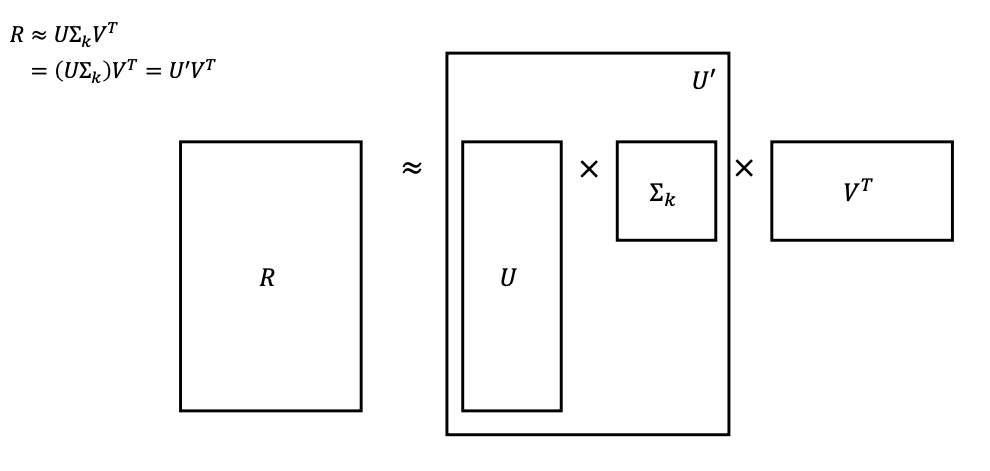

* Rating Matrix를 P와 Q로 분해
    * $R \approx P \times Q^T = \hat{R}$
        * $P -> |U|\times k$
        * $Q -> |I|\times k$
    * 평점 예측치 : $\hat{r}_{u,i} = p^T_uq_i$
* MF 학습
    * $R$과 $\hat{R}$이 최대한 유사하도록 X, Y를 학습하는 과정
    * $\underset{P,Q}min \underset{observed r_{u,i}}\sum (r_{u,i}-p^T_uq_i)^2$

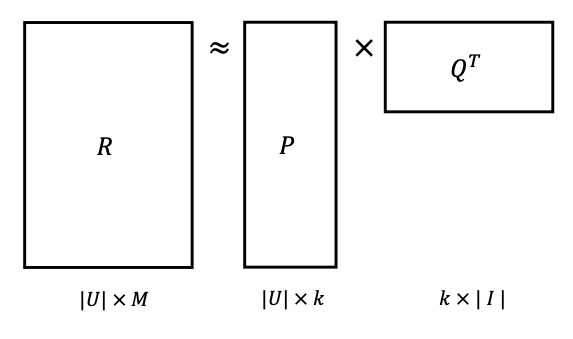